In [58]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [59]:
customer_data =  pd.read_csv(r"C:\Users\ivers\Downloads\ML Projects\CSV files\Churn_Modelling.csv")

Reads Data 

In [60]:
columns = customer_data.columns.values.tolist()
print(columns)

['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


Prints column names 


In [61]:
dataset = customer_data.drop(['RowNumber','CustomerId','Surname'], axis =1)

CustomerID, Surname, and Rownumber have no effect on a customer leaving

ML needs to use numbers so we need to convert Geography and Gender to numerical values

In [62]:
dataset = dataset.drop(['Geography', 'Gender'], axis = 1)

Used get_dummies method to convert categorical columns to numerical columns

In [63]:
Geography = pd.get_dummies(customer_data.Geography).iloc[:,1:]
Gender = pd.get_dummies(customer_data.Gender).iloc[:,1:]

In [64]:
dataset = pd.concat([dataset, Geography, Gender], axis = 1)

Added Geography and Gender back to dataset using numerical values 

In [65]:
X = dataset.drop(['Exited'], axis = 1)
y = dataset['Exited'] 

Isolated variable we're trying to predict ("Exited")

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, 
                                                    random_state=0)

## DATA PREPROCESSING
Using the the "80-20" rule (80% training, 20% testing)

## Training Algorithm

Used Random Forest algorithm to train and fit data
trains data using fit method
Predicts data using fit method

In [67]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 200, random_state = 0)
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)


## Evaluation 
Checking perofrmance of classification mdoel and its metrics

In [68]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1595
           1       0.73      0.51      0.60       405

    accuracy                           0.86      2000
   macro avg       0.81      0.73      0.76      2000
weighted avg       0.85      0.86      0.85      2000

0.8635


Predicts customer Churn roughly 86% of the time

## Feature Evaluation

Now finding the most important feature that predicts a customer churn.

<AxesSubplot:>

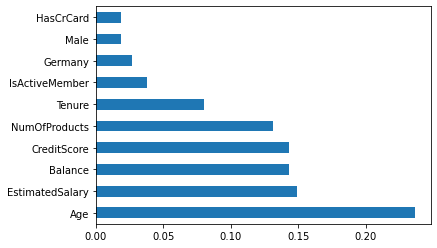

In [69]:
feat_importances = pd.Series(classifier.feature_importances_,
                            index= X.columns)
feat_importances.nlargest(10).plot(kind = 'barh')

## Analysis

Based on the data age has the biggest impact on customer churnm followed by their estimated salary and account balance